## Exercise 1 - Generic problem 

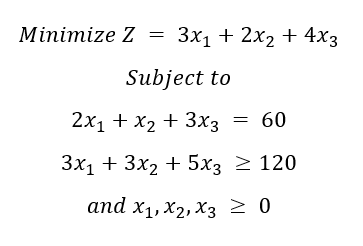

In [2]:

display("image/png", read("linear problem 4.6-9.png"))

In [12]:
using JuMP, GLPK

#Creating the Problem
LpModel = Model(GLPK.Optimizer) 

#Creating the variables
@variable(LpModel, x1 >= 0)
@variable(LpModel, x2 >= 0)
@variable(LpModel, x3 >= 0)

#Objective function
@objective(LpModel, Min, 3x1+2x2+4x3)

#Constraints
@constraint(LpModel, 2x1+x2+3x3 == 60 )
@constraint(LpModel, 3x1+3x2+5x3 >= 120 )

#Show the formulated model
print(LpModel);

#Solving the model
status = JuMP.optimize!(LpModel)

println("\n")

#Showing the status
@show JuMP.termination_status(LpModel)

#Showing the results from the decision variables and the objective function.
println("x1 = ", JuMP.value.(x1))
println("x2 = ", JuMP.value.(x2))
println("x3 = ", JuMP.value.(x3))
println("Total: ", JuMP.objective_value(LpModel))

Min 3 x1 + 2 x2 + 4 x3
Subject to
 2 x1 + x2 + 3 x3 == 60.0
 3 x1 + 3 x2 + 5 x3 >= 120.0
 x1 >= 0.0
 x2 >= 0.0
 x3 >= 0.0


JuMP.termination_status(LpModel) = MathOptInterface.OPTIMAL
x1 = 0.0
x2 = 15.0
x3 = 15.0
Total: 90.0


## Exercise 2 - Transportation problem 

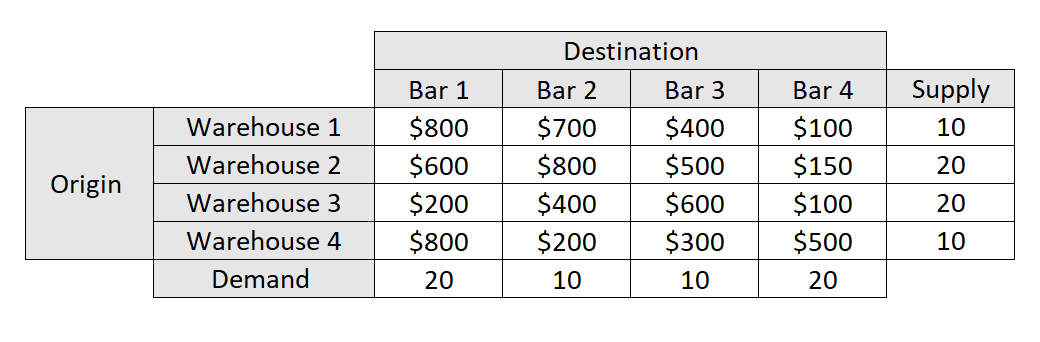

In [8]:
display("image/png", read("table exercise.png"))

In [9]:
using JuMP, GLPK

In [13]:
warehouses = ["Warehouse 1", "Warehouse 2","Warehouse 3","Warehouse 4"]

values_warehouses = [10,20,20,10]


bars = ["Bar 1","Bar 2","Bar 3","Bar 4"]

values_bars = [20,10,10,20]
 
costs = [800 700 400 100;
         600 800 500 150;
         200 400 600 100;
         800 200 300 500]


nwarehouses = length(warehouses)
nbars = length(bars)

#Creating  the dictionaries 
supply_dict = Dict(zip( warehouses, values_warehouses))
demand_dict = Dict(zip(bars, values_bars))
costs_dict = Dict()
for i in 1:length(warehouses)
  for j in 1:length(bars)
    costs_dict[warehouses[i], bars[j]] = costs[i,j]
  end
end


#Create problem
Transportation_example_julia = Model(GLPK.Optimizer)

#Create variables
@variable(Transportation_example_julia, x[warehouses, bars] >= 0)


@objective(Transportation_example_julia, Min, sum(costs_dict[i,j]*x[i,j] for i in warehouses, j in bars))


#Constraints
for i in warehouses
    @constraint(Transportation_example_julia, sum(x[i,j] for j in bars) == supply_dict[i] )
end


for j in bars
    @constraint(Transportation_example_julia, sum(x[i,j] for i in warehouses) == demand_dict[j] )
end



print(Transportation_example_julia);

status = JuMP.optimize!(Transportation_example_julia) # solves the model

println("\n")

#Print status 
@show JuMP.termination_status(Transportation_example_julia)

#Print the result of the objective function
print("Total: ",JuMP.objective_value(Transportation_example_julia))

#Print decision variables
print("Decision variables: ",JuMP.value.(x))

Min 800 x[Warehouse 1,Bar 1] + 700 x[Warehouse 1,Bar 2] + 400 x[Warehouse 1,Bar 3] + 100 x[Warehouse 1,Bar 4] + 600 x[Warehouse 2,Bar 1] + 800 x[Warehouse 2,Bar 2] + 500 x[Warehouse 2,Bar 3] + 150 x[Warehouse 2,Bar 4] + 200 x[Warehouse 3,Bar 1] + 400 x[Warehouse 3,Bar 2] + 600 x[Warehouse 3,Bar 3] + 100 x[Warehouse 3,Bar 4] + 800 x[Warehouse 4,Bar 1] + 200 x[Warehouse 4,Bar 2] + 300 x[Warehouse 4,Bar 3] + 500 x[Warehouse 4,Bar 4]
Subject to
 x[Warehouse 1,Bar 1] + x[Warehouse 1,Bar 2] + x[Warehouse 1,Bar 3] + x[Warehouse 1,Bar 4] == 10.0
 x[Warehouse 2,Bar 1] + x[Warehouse 2,Bar 2] + x[Warehouse 2,Bar 3] + x[Warehouse 2,Bar 4] == 20.0
 x[Warehouse 3,Bar 1] + x[Warehouse 3,Bar 2] + x[Warehouse 3,Bar 3] + x[Warehouse 3,Bar 4] == 20.0
 x[Warehouse 4,Bar 1] + x[Warehouse 4,Bar 2] + x[Warehouse 4,Bar 3] + x[Warehouse 4,Bar 4] == 10.0
 x[Warehouse 1,Bar 1] + x[Warehouse 2,Bar 1] + x[Warehouse 3,Bar 1] + x[Warehouse 4,Bar 1] == 20.0
 x[Warehouse 1,Bar 2] + x[Warehouse 2,Bar 2] + x[Warehouse 3